# Composed Open Population SIRV Model

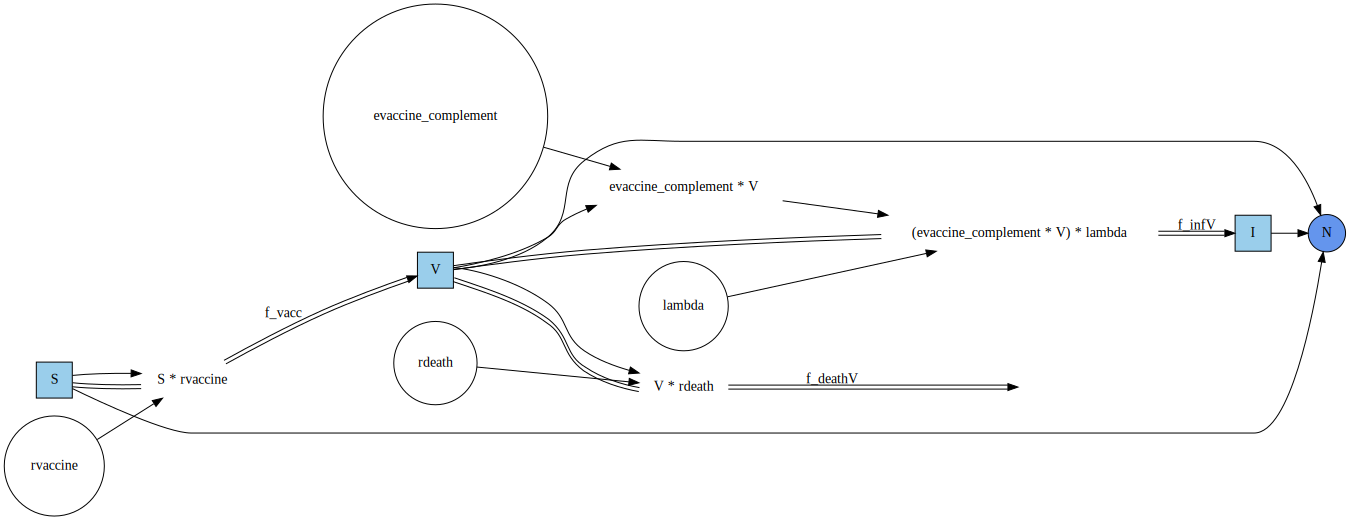

In [1]:
using GraphViz

using StockFlow
using StockFlow.Syntax

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams

sir = @stock_and_flow begin

    :stocks
    S
    I
    R

    :parameters
    rbirth
    cbeta
    rrecovery
    rdeath

    :dynamic_variables
    v_inf₁ = I / N
    v_inf₂ = v_inf₁ * cbeta
    v_inf₃ =  v_inf₂ * S

    :flows
    CLOUD => f_birth(rbirth * N) => S
    S => f_inf(v_inf₃) => I
    I => f_rec(rrecovery * I) => R
    S => f_deathS(S * rdeath) => CLOUD
    I => f_deathI(I * rdeath) => CLOUD
    R => f_deathR(R * rdeath) => CLOUD


    :sums
    N = [I, R, S]

end

GraphF(sir)

svi = @stock_and_flow begin

    :stocks
    S
    V
    I

    :parameters
    rvaccine
    rdeath
    lambda
    evaccine_complement # 1.0 - evaccine

    :dynamic_variables
    v_vacV = evaccine_complement * V
    v_infV = v_vacV * lambda


    :flows
    S => f_vacc(S * rvaccine) => V
    V => f_deathV(V * rdeath) => CLOUD
    V => f_infV(v_infV) => I

    :sums
    N = [V, I, S]

end

GraphF(svi)

Define the UWD-algebra

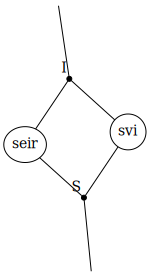

In [2]:
sirv_uwd = @relation (S,I) begin
    seir(S,I)
    svi(S,I)
end;
display_uwd(sirv_uwd)

Define a foot of the structured multicospan

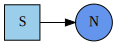

In [3]:
footS=foot(:S, :N, :S=>:N)
GraphF(footS;schema="C0")

Define a foot of the structured multicospan

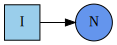

In [4]:
footI=foot(:I, :N, :I=>:N)
GraphF(footI;schema="C0")

Open sir and svi stock and flow diagram with the feet defined before

In [5]:
open_sir=Open(sir, footS, footI)
open_svi=Open(svi, footS, footI)

Catlab.CategoricalAlgebra.StructuredCospans.StructuredCospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{StockAndFlow0, StockAndFlowF}, Catlab.CategoricalAlgebra.FreeDiagrams.Multicospan{StockAndFlowF, Catlab.CategoricalAlgebra.CSets.StructTightACSetTransformation{ACSets.Schemas.TypeLevelBasicSchema{Symbol, Tuple{:S, :SV, :LS, :F, :I, :O, :V, :LV, :LSV, :P, :LVV, :LPV}, Tuple{(:lss, :LS, :S), (:lssv, :LS, :SV), (:ifn, :I, :F), (:is, :I, :S), (:ofn, :O, :F), (:os, :O, :S), (:fv, :F, :V), (:lvs, :LV, :S), (:lvv, :LV, :V), (:lsvsv, :LSV, :SV), (:lsvv, :LSV, :V), (:lvsrc, :LVV, :V), (:lvtgt, :LVV, :V), (:lpvp, :LPV, :P), (:lpvv, :LPV, :V)}, Tuple{:Name, :Op, :Position}, Tuple{(:sname, :S, :Name), (:svname, :SV, :Name), (:fname, :F, :Name), (:vname, :V, :Name), (:pname, :P, :Name), (:vop, :V, :Op), (:lvsposition, :LV, :Position), (:lsvsvposition, :LSV, :Position), (:lvsrcposition, :LVV, :Position), (:lpvpposition, :LPV, :Position)}}, NamedTuple{(:S, :SV, :LS, :F, :I, :O, :V, :

Compose those two models according the UWD-algebra

In [6]:
open_sirv = oapply(sirv_uwd, [open_sir, open_svi])

Catlab.CategoricalAlgebra.StructuredCospans.StructuredMulticospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{StockAndFlow0, StockAndFlowF}, Catlab.CategoricalAlgebra.FreeDiagrams.Multicospan{StockAndFlowF, Catlab.CategoricalAlgebra.CSets.StructTightACSetTransformation{ACSets.Schemas.TypeLevelBasicSchema{Symbol, Tuple{:S, :SV, :LS, :F, :I, :O, :V, :LV, :LSV, :P, :LVV, :LPV}, Tuple{(:lss, :LS, :S), (:lssv, :LS, :SV), (:ifn, :I, :F), (:is, :I, :S), (:ofn, :O, :F), (:os, :O, :S), (:fv, :F, :V), (:lvs, :LV, :S), (:lvv, :LV, :V), (:lsvsv, :LSV, :SV), (:lsvv, :LSV, :V), (:lvsrc, :LVV, :V), (:lvtgt, :LVV, :V), (:lpvp, :LPV, :P), (:lpvv, :LPV, :V)}, Tuple{:Name, :Op, :Position}, Tuple{(:sname, :S, :Name), (:svname, :SV, :Name), (:fname, :F, :Name), (:vname, :V, :Name), (:pname, :P, :Name), (:vop, :V, :Op), (:lvsposition, :LV, :Position), (:lsvsvposition, :LSV, :Position), (:lvsrcposition, :LVV, :Position), (:lpvpposition, :LPV, :Position)}}, NamedTuple{(:S, :SV, :LS, :F, :I, :O, 

The composed stock and flow diagram is the apex of the composed open stock and flow diagram

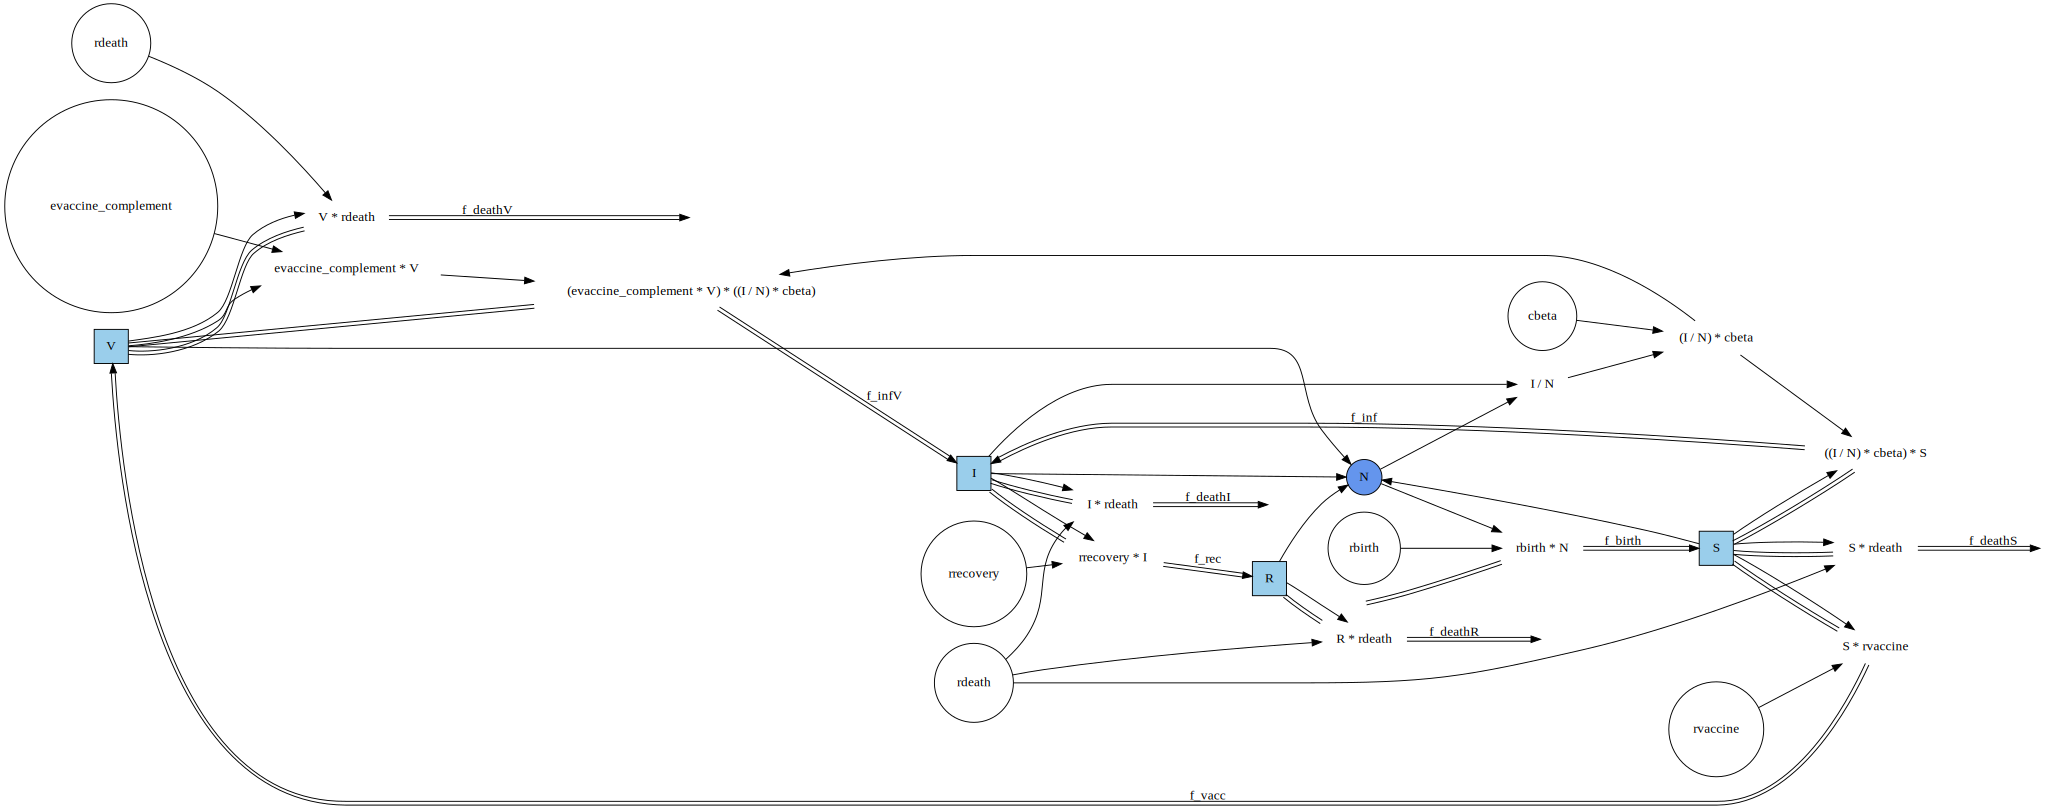

In [7]:
sirv = apex(open_sirv)

GraphF(sirv)

L = @stock_and_flow begin
    :stocks
    V
    I

    :parameters
    lambda
    cbeta
    evaccine_complement

    :dynamic_variables
    v_inf₁ = I / N
    v_inf₂ = v_inf₁ * cbeta

    v_vacV = evaccine_complement * V


    v_infV = v_vacV * lambda


    :flows
    V => f_infV(v_infV) => I

    :sums
    N = [V, I]
    end;



GraphF(L)

I = @stock_and_flow begin
    :stocks
    V
    I

    :parameters
    cbeta
    evaccine_complement

    :dynamic_variables
    v_inf₁ = I / N
    v_inf₂ = v_inf₁ * cbeta
    v_vacV = evaccine_complement * V
    v_infV = *(v_vacV)


    :flows
    V => f_infV(v_infV) => I

    :sums
    N = [V, I]
    end;



GraphF(I)

R = @stock_and_flow begin
    :stocks
    V
    I

    :parameters
    cbeta
    evaccine_complement

    :dynamic_variables
    v_inf₁ = I / N
    v_inf₂ = v_inf₁ * cbeta

    v_vacV = evaccine_complement * V

    v_infV = v_vacV * v_inf₂

    :flows
    V => f_infV(v_infV) => I

    :sums
    N = [V, I]
    end;



GraphF(R)

using AlgebraicRewriting
using AlgebraicRewriting: rewrite
const hom = Catlab.CategoricalAlgebra.homomorphism
rule = Rule(hom(I,L), hom(I,R))

sirv_rewritten = rewrite(rule, sirv)
GraphF(sirv_rewritten)

define values of constant parameters

In [8]:
p = LVector(
    cbeta=0.1, rbirth=0.001, rdeath=0.001, rrecovery=0.05, # for model sir
    rvaccine=0.01, evaccine=0.3, evaccine_complement = 0.7 # for model svi
)

7-element LabelledArrays.LArray{Float64, 1, Vector{Float64}, (:cbeta, :rbirth, :rdeath, :rrecovery, :rvaccine, :evaccine, :evaccine_complement)}:
               :cbeta => 0.1
              :rbirth => 0.001
              :rdeath => 0.001
           :rrecovery => 0.05
            :rvaccine => 0.01
            :evaccine => 0.3
 :evaccine_complement => 0.7

define initial values for stocks

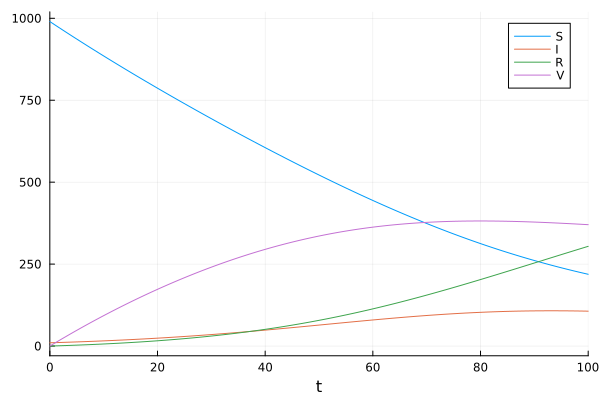

In [9]:
u0 = LVector(
    S=990.0, I=10.0, R=0.0, V=0.0
)

prob_sirv = ODEProblem(vectorfield(sirv_rewritten),u0,(0.0,100.0),p);
sol_sirv = solve(prob_sirv,Tsit5(),abstol=1e-8);
plot(sol_sirv)

to have the figures plotted fix to the wider of the cells

In [10]:
HTML("""
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>
""")

HTML{String}("<style>\n.output_svg div{\n  width: 100% !important;\n  height: 100% !important;\n}\n</style>\n")